<a href="https://colab.research.google.com/github/Gitprincesskerry/IS362/blob/main/Project4/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u><b><center>Mushroom Dataset Analysis</b></center></u>

Your assignment is to use the Dataset From (https://archive.ics.uci.edu/ml/datasets/Mushroom) to do the following:

- First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
- Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
- Add meaningful names for each column.
- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might
become 0 and “p” might become 1. This is because your downstream processing in Project 4 using
scikit-learn requires that values be stored as numerics.
- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
- Include some text describing your preliminary conclusions about whether either of the other columns
could be helpful in predicting if a specific mushroom is edible or poisonous.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
datadict = open('agaricus-lepiota.names', 'r')
print(datadict.read())

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [ ]:
agarfile = open('agaricus-lepiota.data', 'r')
#print(agarfile.read())

mush_data = 'agaricus-lepiota.data'
mush_data2 = pd.read_csv(mush_data, usecols=[0, 1, 5])
mush_data2.head(6)

,p,x,p.1
0,e,x,a
1,e,b,l
2,p,x,p
3,e,x,n
4,e,x,a
5,e,b,a


In [ ]:
rename_columns = ['Edible Status (E/P)', 'Cap Shape', 'Odor']
mush_data2.columns = rename_columns

num_data_replace = mush_data2.replace({'Edible Status (E/P)':{'e':0, 'p':1},
                                       'Cap Shape':{'b':0, 'c':1,'x':2,'f':3,'k':4,'s':5},
                                       'Odor':{'a':0, 'l':1,'c':2,'y':3,'f':4,'m':5,'n':6, 'p':7,'s':8}})
num_data_replace

,Edible Status (E/P),Cap Shape,Odor
0,0,2,0
1,0,0,1
2,1,2,7
3,0,2,6
4,0,2,0
...,...,...,...
8118,0,4,6
8119,0,2,6
8120,0,3,6
8121,1,4,3


In [ ]:
ep = num_data_replace['Edible Status (E/P)'].value_counts()
ep

cs = num_data_replace['Cap Shape'].value_counts()
cs

od = num_data_replace['Odor'].value_counts()
od

6    3528
4    2160
3     576
8     576
1     400
0     400
7     255
2     192
5      36
Name: Odor, dtype: int64

Text(0.5, 1.0, 'Edible Status (E/P)')

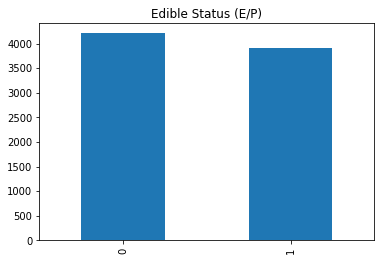

In [ ]:
ep.plot(kind='bar')
plt.title(label='Edible Status (E/P)')


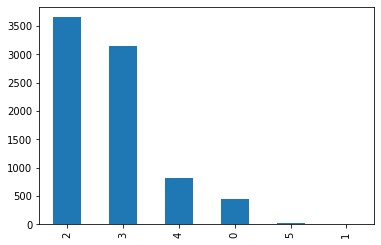

In [ ]:
cs.plot(kind='bar')

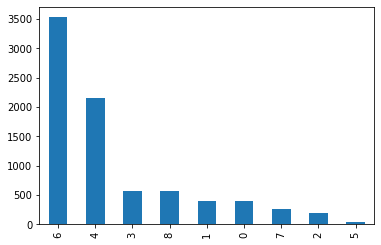

In [ ]:
od.plot(kind='bar')

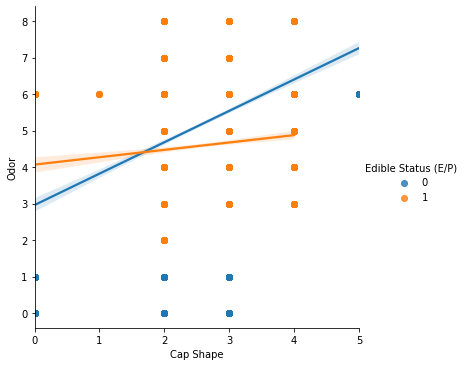

In [ ]:
sns.lmplot(hue='Edible Status (E/P)',x='Cap Shape', y='Odor',data=num_data_replace)

# <center><b> Ski-Kit Learn Analysis </center></b>

Your assignment is to use the Dataset From (https://archive.ics.uci.edu/ml/datasets/Mushroom) to do the following:

- First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
- Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
- Add meaningful names for each column.
- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might
become 0 and “p” might become 1. This is because your downstream processing in Project 4 using
scikit-learn requires that values be stored as numerics.
- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
- Include some text describing your preliminary conclusions about whether either of the other columns
could be helpful in predicting if a specific mushroom is edible or poisonous.

In [102]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

agarfile = open('agaricus-lepiota.data', 'r')
#print(agarfile.read())

mush_data = 'agaricus-lepiota.data'
mush_data2 = pd.read_csv(mush_data, usecols=[0, 1, 5])
mush_data2.head(6)

,p,x,p.1
0,e,x,a
1,e,b,l
2,p,x,p
3,e,x,n
4,e,x,a
5,e,b,a


In [94]:
rename_columns = ['Edible Status (E/P)', 'Cap Shape', 'Odor']
mush_data2.columns = rename_columns

num_data_replace = mush_data2.replace({'Edible Status (E/P)':{'e':0, 'p':1},
                                       'Cap Shape':{'b':0, 'c':1,'x':2,'f':3,'k':4,'s':5},
                                       'Odor':{'a':0, 'l':1,'c':2,'y':3,'f':4,'m':5,'n':6, 'p':7,'s':8}})
num_data_replace

,Edible Status (E/P),Cap Shape,Odor
0,0,2,0
1,0,0,1
2,1,2,7
3,0,2,6
4,0,2,0
...,...,...,...
8118,0,4,6
8119,0,2,6
8120,0,3,6
8121,1,4,3


In [95]:
#Creation of dummy data for the Edible Status (E/P) field
dummy_data_edible = pd.Series(num_data_replace['Edible Status (E/P)'])
psuedo_odor = pd.get_dummies(dummy_data_edible)
print(dummy_data_edible)

#Creation of dummy data for the Odor field
dummy_data_odor = pd.Series(num_data_replace['Odor'])
psuedo_odor = pd.get_dummies(dummy_data_odor)
print(dummy_data_odor)

0       0
1       0
2       1
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    1
8122    0
Name: Edible Status (E/P), Length: 8123, dtype: int64
0       0
1       1
2       7
3       6
4       0
       ..
8118    6
8119    6
8120    6
8121    3
8122    6
Name: Odor, Length: 8123, dtype: int64


In [96]:
# Odor values as an array
odor_values = num_data_replace['Odor'].values
odor_values

array([0, 1, 7, ..., 6, 3, 6])

In [105]:
# Edible status values as an array
edible_status_values = num_data_replace['Edible Status (E/P)'].values
edible_status_values

# Cap Shape values as an array
cap_shape_values = num_data_replace['Cap Shape'].values
cap_shape_values

array([2, 0, 2, ..., 3, 4, 2])

In [98]:
# Linear model 
lreg = linear_model.LinearRegression()

odor_values_train, odor_values_test, edible_status_train, edible_status_test = train_test_split(odor_values, edible_status_values, test_size=0.3)


In [99]:
# Linear Regression Trained
lreg_train = lreg.fit(odor_values_train.reshape(-1, 1), edible_status_train)

In [100]:
#Score - Holds the percentage of how closely thr model matched the real values
score = lreg_train.score(odor_values_test.reshape(-1, 1), edible_status_test)
score

#Predicts the values for new data which will give us what the model thinks the poisionous value is for each specific odor value
predict_edible_values = lreg_train.predict(odor_values_test.reshape(-1,1))

error = edible_status_test - predict_edible_values

In [106]:
#The following metric determines the accruacy of the edible status of the mushroom based on the odor
print(np.sqrt(metrics.mean_squared_error(edible_status_test, predict_edible_values)))
#There is 50% accruacy of the edible status of the mushroom based on the odor

0.4998346890309619


In [109]:
# Linear model 2
lreg = linear_model.LinearRegression()

cap_shape_values_train, cap_shape_values_test, edible_status_train, edible_status_test = train_test_split(cap_shape_values, edible_status_values, test_size=0.3)

#Predicts the values for new data which will give us what the model thinks the poisionous value is for each specific odor value
predict_edible_values = lreg_train.predict(cap_shape_values_test.reshape(-1,1))

#The following metric determines the accruacy of the edible status of the mushroom based on the cap shape
print(np.sqrt(metrics.mean_squared_error(edible_status_test, predict_edible_values)))
#There is aprproximately 51% accruacy of the edible status of the mushroom based on the odor

0.5075248051708915
